# Exploratory Data Analysis

In [1]:
#import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [5]:
df = pd.read_csv("../data/raw/gdm.csv")
df.head()

,number,age (years),ethnicity,diabetes mellitus,mean diastolic bp (mmhg),mean systolic bp (mmhg),central armellini fat (mm),current gestational age,pregnancies (number),first fasting glucose (mg/dl),bmi pregestational (kg/m),gestational age at birth,type of delivery,child birth weight (g),gestational dm
0,1,20,NaN,0,73.5,125.0,28.1,"12,1",1.0,NaN,33.20,"41,0",1,3840,0
1,2,28,0.0,0,75.5,112.0,43.1,"11,5",1.0,76.0,21.50,"39,1",0,2810,0
2,5,21,1.0,0,70.5,116.0,41.4,"12,6",1.0,86.0,21.41,"39,5",0,2455,0
3,9,25,0.0,0,92.5,167.0,39.6,"16,2",4.0,NaN,55.36,"39,4",0,3400,0
4,13,33,1.0,0,79.0,137.0,67.8,"11,2",2.0,86.0,30.85,"40,2",1,3930,1


Number is a unique id that can be easily dropped, target is gestational dm (0-absent, 1-present). Features such as type of delivery, child birth weight, gestational age at birth can be dropped before training as these events happen at the final stage of pregnancy and therefore have no role on gdm which is diagnosed between 26-28 weeks.Gestational age would need formatting.

In [6]:
#delete number column 
del df["number"] 

#Check missing values, datatypes, dimension
print(f"Columns are: {df.columns}")
print("-"*50)
print(f"Shape of the dataframe is: {df.shape}")
print("-"*50)
print(f"Basic information: {df.info()}")

Columns are: Index(['age (years)', 'ethnicity', 'diabetes mellitus',
       'mean diastolic bp (mmhg)', 'mean systolic bp (mmhg)',
       'central armellini fat (mm)', 'current gestational age',
       'pregnancies (number)', 'first fasting glucose (mg/dl)',
       'bmi pregestational (kg/m)', 'gestational age at birth',
       'type of delivery', 'child birth weight (g)', 'gestational dm'],
      dtype='object')
--------------------------------------------------
Shape of the dataframe is: (133, 14)
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133 entries, 0 to 132
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age (years)                    133 non-null    int64  
 1   ethnicity                      132 non-null    float64
 2   diabetes mellitus              133 non-null    int64  
 3   mean diastolic bp (mmhg)       133

There are 13 features + 1 target, missing values in ethnicity, pregnancies (number), first fasting glucose (mg/dl) and mixed data types. Gestational age would need to be typecast to float.

In [10]:
# Reformatting "current gestational age", "gestational age at birth"
df["current gestational age"] =df["current gestational age"].apply(lambda x: str(x.replace(',','.'))).astype(float)
df["gestational age at birth"] =df["gestational age at birth"].apply(lambda x: str(x.replace(',','.'))).astype(float)
df.head()

,age (years),ethnicity,diabetes mellitus,mean diastolic bp (mmhg),mean systolic bp (mmhg),central armellini fat (mm),current gestational age,pregnancies (number),first fasting glucose (mg/dl),bmi pregestational (kg/m),gestational age at birth,type of delivery,child birth weight (g),gestational dm
0,20,NaN,0,73.5,125.0,28.1,12.1,1.0,NaN,33.20,41.0,1,3840,0
1,28,0.0,0,75.5,112.0,43.1,11.5,1.0,76.0,21.50,39.1,0,2810,0
2,21,1.0,0,70.5,116.0,41.4,12.6,1.0,86.0,21.41,39.5,0,2455,0
3,25,0.0,0,92.5,167.0,39.6,16.2,4.0,NaN,55.36,39.4,0,3400,0
4,33,1.0,0,79.0,137.0,67.8,11.2,2.0,86.0,30.85,40.2,1,3930,1


In [11]:
df.describe()

,age (years),ethnicity,diabetes mellitus,mean diastolic bp (mmhg),mean systolic bp (mmhg),central armellini fat (mm),current gestational age,pregnancies (number),first fasting glucose (mg/dl),bmi pregestational (kg/m),gestational age at birth,type of delivery,child birth weight (g),gestational dm
count,133.000000,132.000000,133.000000,133.000000,133.000000,133.000000,133.000000,128.000000,103.000000,132.000000,133.000000,133.000000,133.000000,133.000000
mean,25.804511,0.439394,0.007519,70.593985,116.578947,44.230827,15.411278,2.351562,81.272816,27.871136,39.010526,0.240602,3257.563910,0.135338
std,6.366887,0.498204,0.086711,8.657662,13.879602,14.606195,3.817735,1.686397,9.429794,6.874268,1.950457,0.429065,490.318578,0.343378
min,15.000000,0.000000,0.000000,51.500000,90.000000,12.700000,6.200000,1.000000,60.000000,15.810000,27.100000,0.000000,1105.000000,0.000000
25%,21.000000,0.000000,0.000000,64.500000,107.000000,34.600000,13.000000,1.000000,76.500000,22.550000,38.300000,0.000000,2944.000000,0.000000
50%,25.000000,0.000000,0.000000,70.000000,114.000000,42.500000,16.200000,2.000000,80.000000,26.260000,39.400000,0.000000,3220.000000,0.000000
75%,30.000000,1.000000,0.000000,75.500000,125.000000,52.700000,18.100000,3.000000,86.500000,30.935000,40.300000,0.000000,3610.000000,0.000000
max,43.000000,1.000000,1.000000,100.500000,167.000000,94.400000,31.500000,9.000000,114.000000,55.360000,41.100000,1.000000,4534.000000,1.000000


Mean age is 26, most do not have previous diabetes, maximum number of pregnancy is 9, mean bmi is 28 which suggest overweight, type of delivery in majority was normal/vaginal. Data shows there are cases with previous Diabetes.  

In [9]:
#Check previous diabetic cases 
df.loc[df["diabetes mellitus"]==1]

,number,age (years),ethnicity,diabetes mellitus,mean diastolic bp (mmhg),mean systolic bp (mmhg),central armellini fat (mm),current gestational age,pregnancies (number),first fasting glucose (mg/dl),bmi pregestational (kg/m),gestational age at birth,type of delivery,child birth weight (g),gestational dm
119,253,31,0.0,1,70.0,124.0,50.1,"14,2",6.0,95.0,39.66,"35,2",0,2830,1


In [13]:
#Check how many cases are past week 25 in current gestational age (since idea is to collect data prior to week 26)
df.loc[df["current gestational age"]>25]

,age (years),ethnicity,diabetes mellitus,mean diastolic bp (mmhg),mean systolic bp (mmhg),central armellini fat (mm),current gestational age,pregnancies (number),first fasting glucose (mg/dl),bmi pregestational (kg/m),gestational age at birth,type of delivery,child birth weight (g),gestational dm
34,33,0.0,0,66.0,106.5,30.15,31.5,5.0,92.0,23.77,38.6,0,2904,0


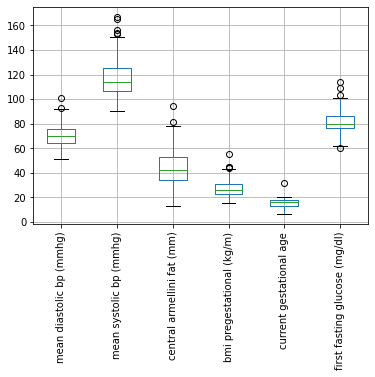

In [29]:
#Check for outliers
boxplot = df.boxplot(column=['mean diastolic bp (mmhg)', 'mean systolic bp (mmhg)', 'central armellini fat (mm)', 'bmi pregestational (kg/m)', 'current gestational age', 'first fasting glucose (mg/dl)'],rot=90)

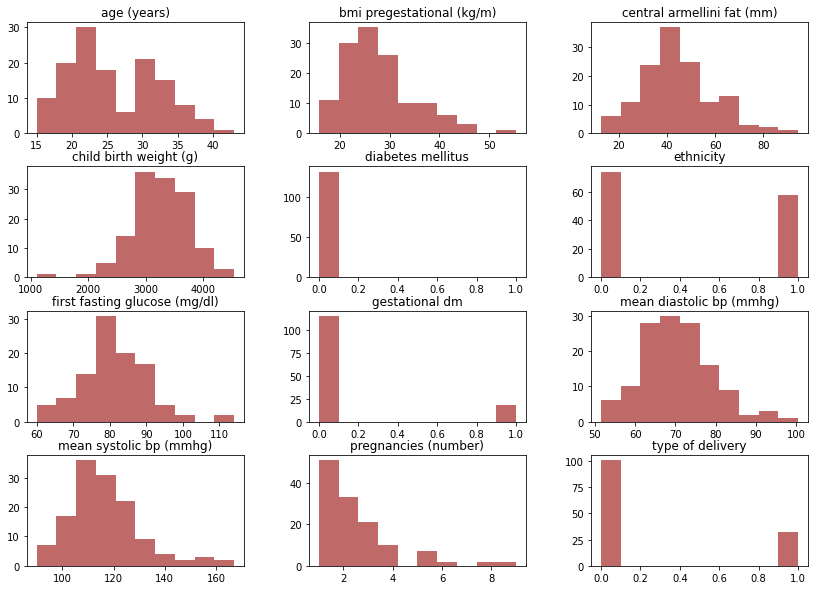

In [51]:
#Check data distribution
df.hist(figsize=(14,10), color="brown",alpha=0.7, grid=False);

Takeawayas: There are 8 continuous features, 3 categorical features and one categorical target. The target classes are imbalanced. Pregnancies(number) is highly skewed towards right reflects the description stats above. 

In [16]:
##Check % of data distribution in target (115, 18)
a,b=np.bincount(df['gestational dm'])
print(f"Percentage of data distribution in the two classes are:")
print(round(a/(a+b)*100,2))
print(round(b/(a+b)*100,2))

Percentage of data distribution in the two classes are:
86.47
13.53


Imbalanced dataset, will need pre-processing

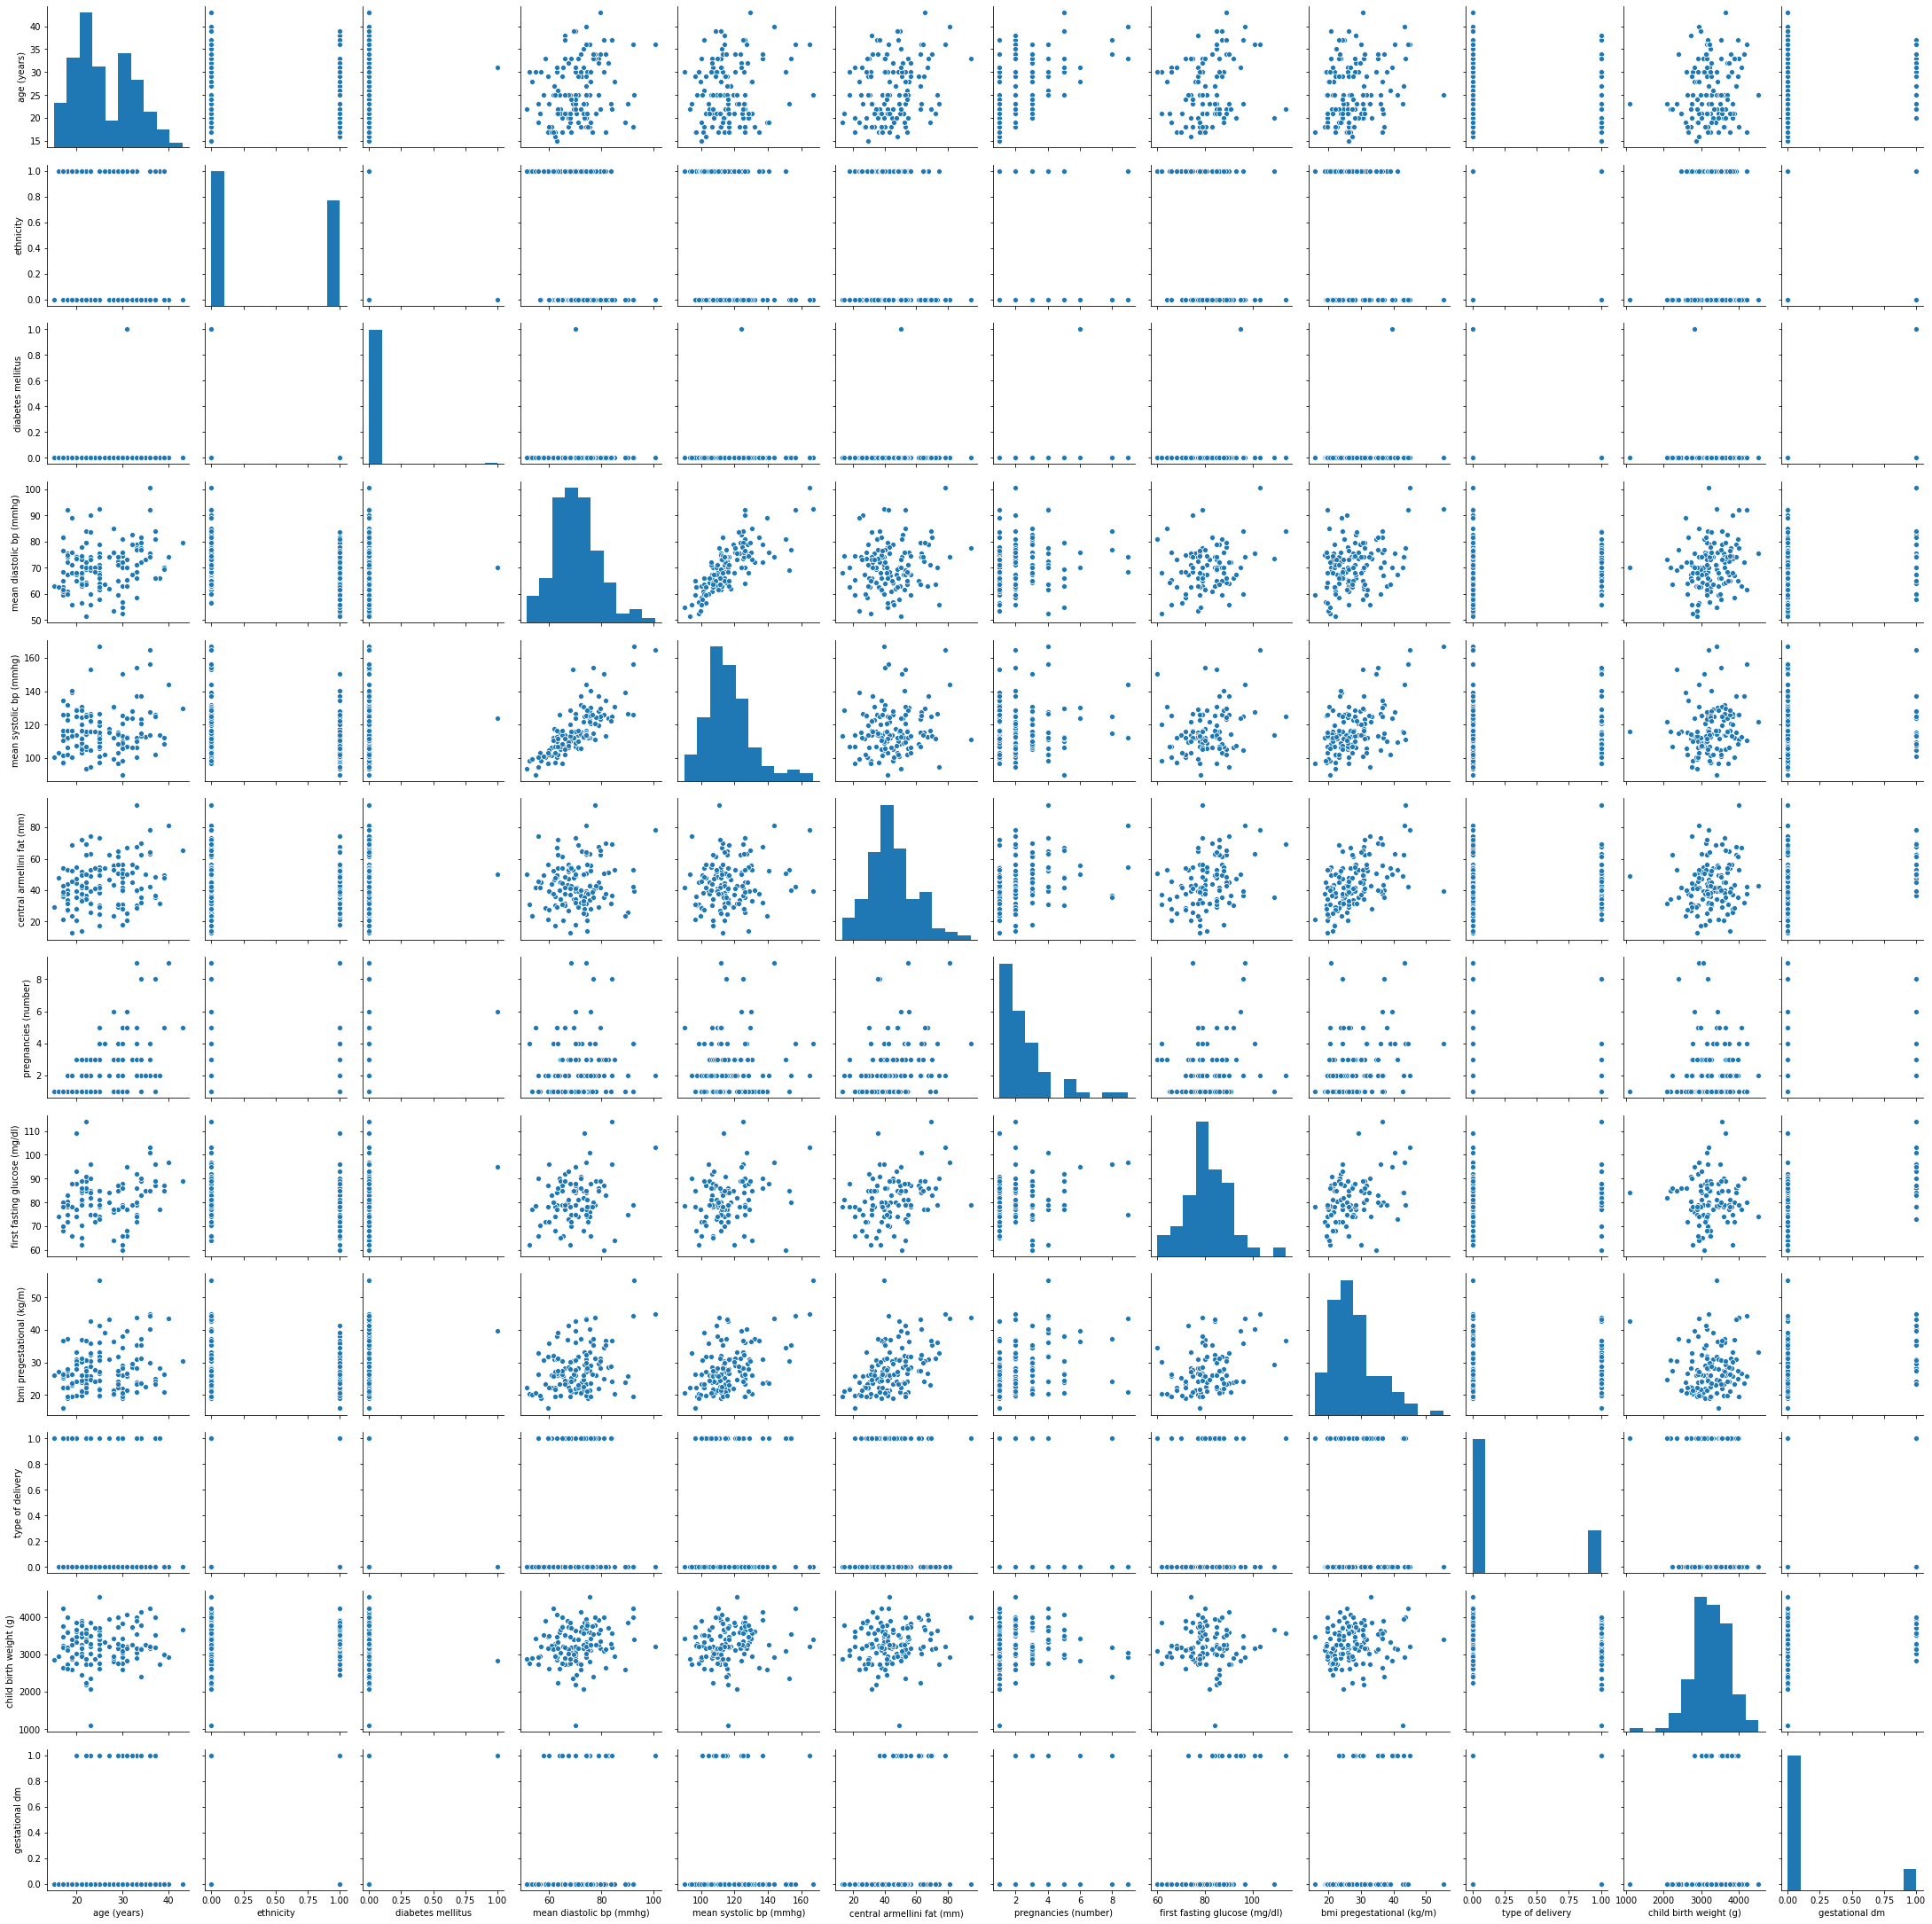

In [44]:
sns.pairplot(df)

Mean systolic pressure is lineraly correlated with mean diasystolic pressure, bmi pregestational (kg/m) seems to have corrleation with central armellini fat (mm).

/Users/harmeetkaur/opt/anaconda3/envs/project-env/lib/python3.8/site-packages/seaborn/axisgrid.py:1840: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


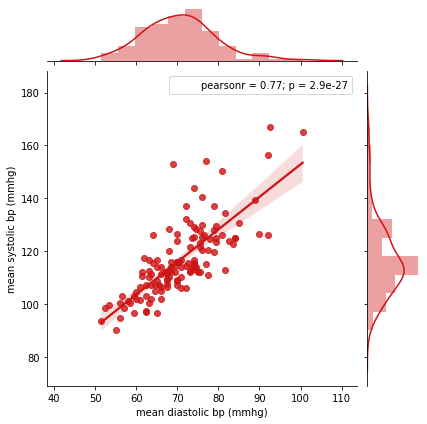

In [48]:
#Check how much is the correlation
import scipy.stats as stats
j=sns.jointplot(df.loc[:,'mean diastolic bp (mmhg)'], df.loc[:,'mean systolic bp (mmhg)'], kind="regg", color="#ce1414")
j.annotate(stats.pearsonr)
plt.show()

There is a high correlation between the variables with pearsonr being .77 (which is close to 1). One of the features can be dropped for further analysis. 

/Users/harmeetkaur/opt/anaconda3/envs/project-env/lib/python3.8/site-packages/seaborn/axisgrid.py:1840: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


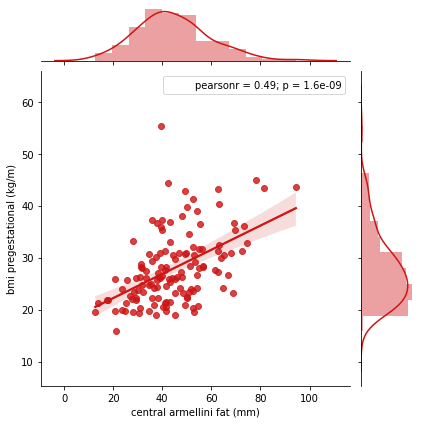

In [49]:
#Check how much is the correlation
p=sns.jointplot(df.loc[:,'central armellini fat (mm)'], df.loc[:,'bmi pregestational (kg/m)'], kind="regg", color="#ce1414")
p.annotate(stats.pearsonr)
plt.show()

There is a positive correlation between the variables with pearsonr being .49. Further analysis would suggest if it would be ideal to drop one of the features.

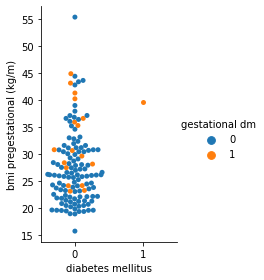

In [10]:
#Analysing relationship between bmi, type of delivery and gdm using catplot
g = sns.catplot(x="diabetes mellitus", y="bmi pregestational (kg/m)",
                hue="gestational dm", 
                data=df, kind="swarm",
                height=4, aspect=.7);

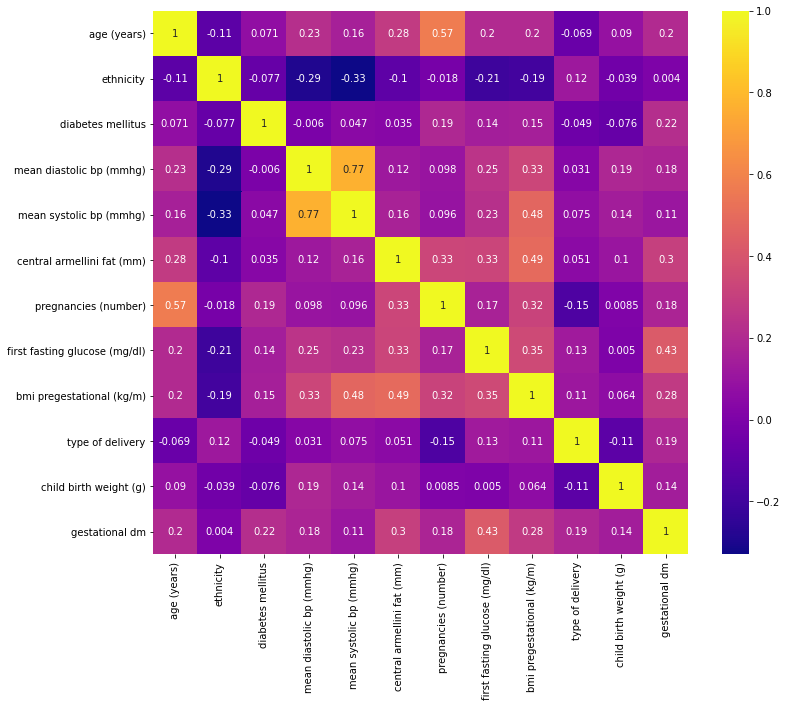

In [45]:
#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(12,10))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="plasma")

## Feature Selection:
Features such as type of delivery, child birth weight, gestational age at birth can be dropped before training as these events happen at the final stage of pregnancy and therefore have no role on gdm which is diagnosed between 26-28 weeks.

In [17]:
df.head()

,age (years),ethnicity,diabetes mellitus,mean diastolic bp (mmhg),mean systolic bp (mmhg),central armellini fat (mm),current gestational age,pregnancies (number),first fasting glucose (mg/dl),bmi pregestational (kg/m),gestational age at birth,type of delivery,child birth weight (g),gestational dm
0,20,NaN,0,73.5,125.0,28.1,12.1,1.0,NaN,33.20,41.0,1,3840,0
1,28,0.0,0,75.5,112.0,43.1,11.5,1.0,76.0,21.50,39.1,0,2810,0
2,21,1.0,0,70.5,116.0,41.4,12.6,1.0,86.0,21.41,39.5,0,2455,0
3,25,0.0,0,92.5,167.0,39.6,16.2,4.0,NaN,55.36,39.4,0,3400,0
4,33,1.0,0,79.0,137.0,67.8,11.2,2.0,86.0,30.85,40.2,1,3930,1


In [18]:
# df.drop(columns={})
df.drop(df.columns[[10, 11, 12]], axis = 1, inplace = True) 
df.head()

,age (years),ethnicity,diabetes mellitus,mean diastolic bp (mmhg),mean systolic bp (mmhg),central armellini fat (mm),current gestational age,pregnancies (number),first fasting glucose (mg/dl),bmi pregestational (kg/m),gestational dm
0,20,NaN,0,73.5,125.0,28.1,12.1,1.0,NaN,33.20,0
1,28,0.0,0,75.5,112.0,43.1,11.5,1.0,76.0,21.50,0
2,21,1.0,0,70.5,116.0,41.4,12.6,1.0,86.0,21.41,0
3,25,0.0,0,92.5,167.0,39.6,16.2,4.0,NaN,55.36,0
4,33,1.0,0,79.0,137.0,67.8,11.2,2.0,86.0,30.85,1


Mitigating potential biases caused by missing data in EHR:
Reference: https://www.sciencedirect.com/science/article/pii/S1532046417300588
https://medium.com/@Cambridge_Spark/tutorial-introduction-to-missing-data-imputation-4912b51c34eb

## Imputing Missing value

In [28]:
#mean imputation of first fasting glucose
mean_ffg=df["first fasting glucose (mg/dl)"].mean()
mean_ffg
mean_ffg_df=df.fillna(value={"first fasting glucose (mg/dl)": mean_ffg})
mean_ffg_df.head()

,age (years),ethnicity,diabetes mellitus,mean diastolic bp (mmhg),mean systolic bp (mmhg),central armellini fat (mm),current gestational age,pregnancies (number),first fasting glucose (mg/dl),bmi pregestational (kg/m),gestational dm
0,20,NaN,0,73.5,125.0,28.1,12.1,1.0,81.272816,33.20,0
1,28,0.0,0,75.5,112.0,43.1,11.5,1.0,76.000000,21.50,0
2,21,1.0,0,70.5,116.0,41.4,12.6,1.0,86.000000,21.41,0
3,25,0.0,0,92.5,167.0,39.6,16.2,4.0,81.272816,55.36,0
4,33,1.0,0,79.0,137.0,67.8,11.2,2.0,86.000000,30.85,1


In [31]:
#mean imputation of pregnancy number
mean_preg=mean_ffg_df["pregnancies (number)"].mean()
mean_preg_df=mean_ffg_df.fillna(value={"pregnancies (number)": mean_preg})
mean_preg_df.head()

,age (years),ethnicity,diabetes mellitus,mean diastolic bp (mmhg),mean systolic bp (mmhg),central armellini fat (mm),current gestational age,pregnancies (number),first fasting glucose (mg/dl),bmi pregestational (kg/m),gestational dm
0,20,NaN,0,73.5,125.0,28.1,12.1,1.0,81.272816,33.20,0
1,28,0.0,0,75.5,112.0,43.1,11.5,1.0,76.000000,21.50,0
2,21,1.0,0,70.5,116.0,41.4,12.6,1.0,86.000000,21.41,0
3,25,0.0,0,92.5,167.0,39.6,16.2,4.0,81.272816,55.36,0
4,33,1.0,0,79.0,137.0,67.8,11.2,2.0,86.000000,30.85,1


In [33]:
mean_preg_df.isna().sum()

age (years)                      0
ethnicity                        1
diabetes mellitus                0
mean diastolic bp (mmhg)         0
mean systolic bp (mmhg)          0
central armellini fat (mm)       0
current gestational age          0
pregnancies (number)             0
first fasting glucose (mg/dl)    0
bmi pregestational (kg/m)        1
gestational dm                   0
dtype: int64